In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.stats import ks_2samp
import numpy as np

# Load data
nasa_features = pd.read_csv("NASA_labeled.csv").drop(columns=["AnomalyLabel"], errors="ignore")
ottawa_features = pd.read_csv("Ottawa_features.csv").drop(columns=["AnomalyLabel"], errors="ignore")

# check columns
common_columns = list(set(nasa_features.columns) & set(ottawa_features.columns))
nasa_features = nasa_features[common_columns]
ottawa_features = ottawa_features[common_columns]


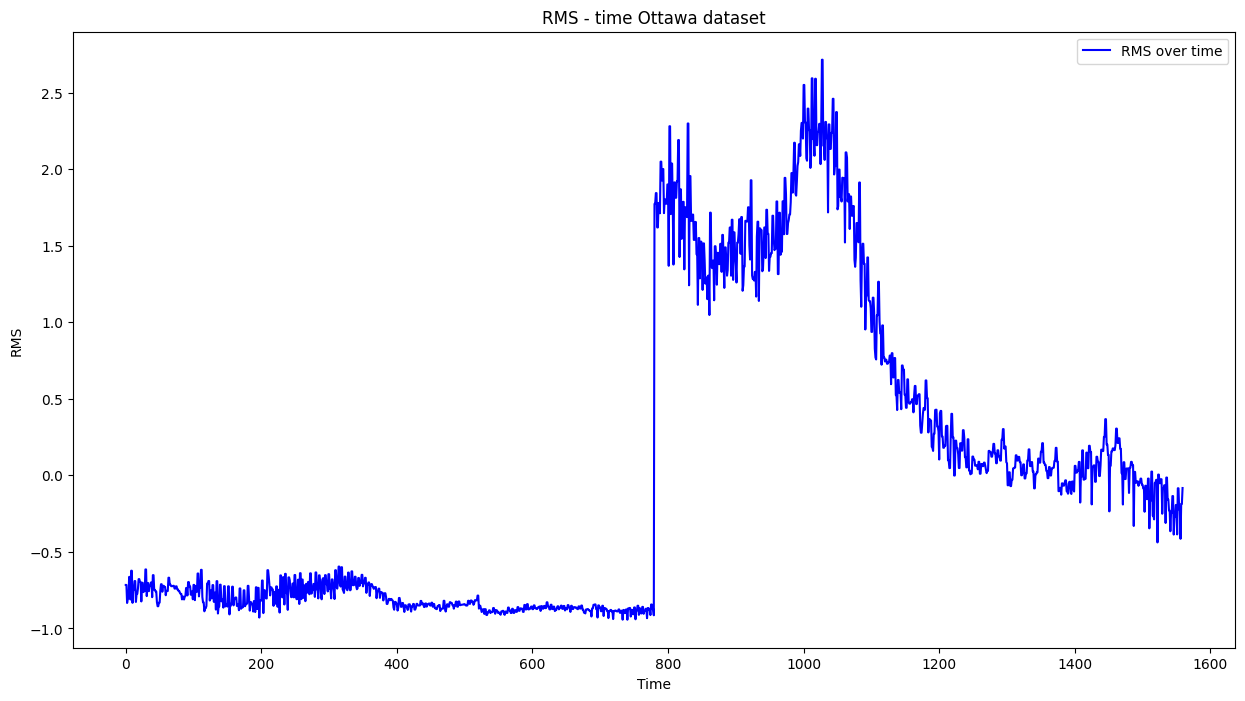

In [2]:
# Plot RMS 
plt.figure(figsize=(15, 8))
plt.plot(ottawa_features["Max"], label="RMS over time", color="blue")
plt.xlabel("Time")
plt.ylabel("RMS")
plt.title("RMS - time Ottawa dataset")
plt.legend()
plt.show()

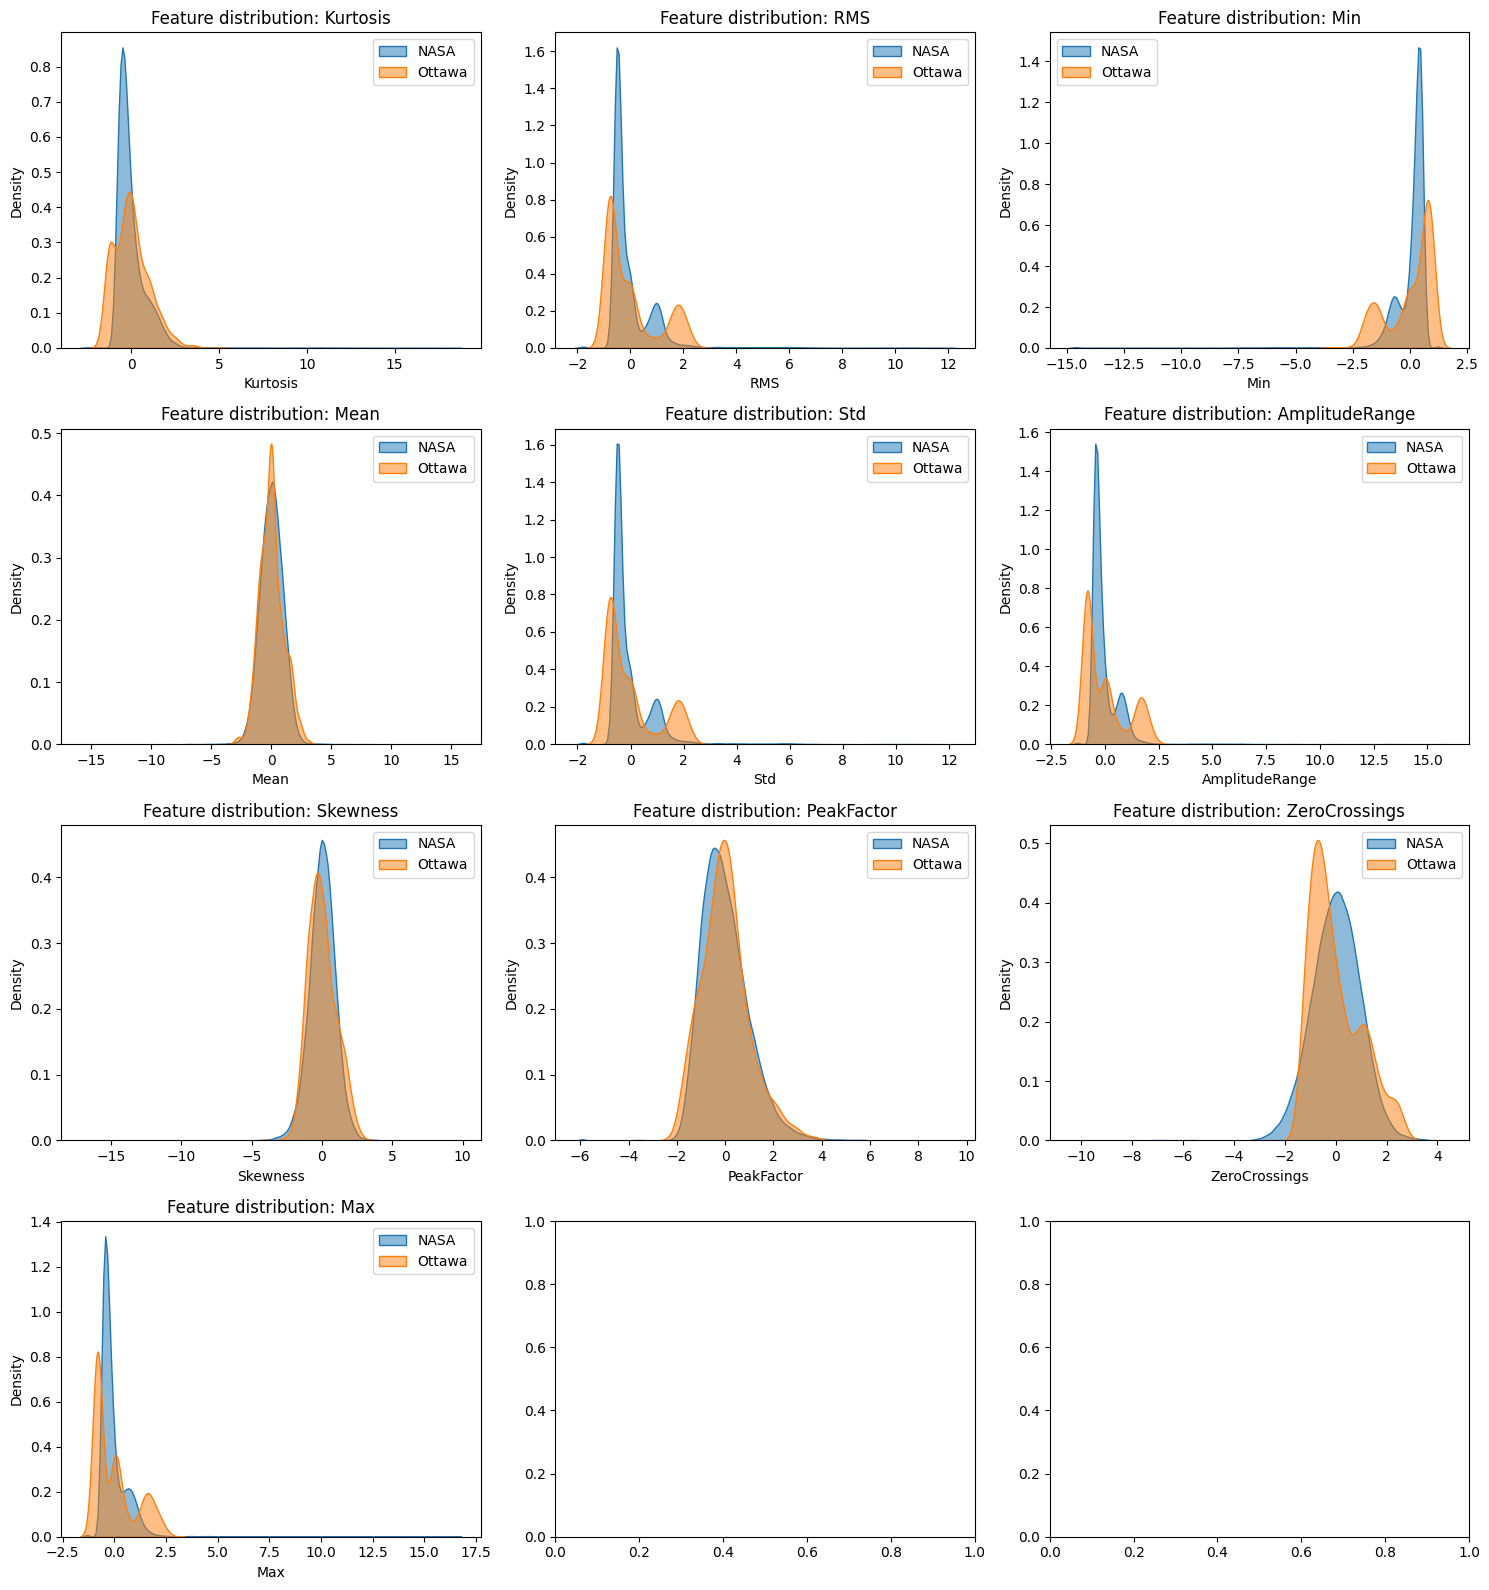

In [3]:
# Generate feature distribution plots
num_features = len(common_columns)
num_cols = 3
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()

for i, col in enumerate(common_columns):
    sns.kdeplot(nasa_features[col], label="NASA", fill=True, alpha=0.5, ax=axes[i])
    sns.kdeplot(ottawa_features[col], label="Ottawa", fill=True, alpha=0.5, ax=axes[i])
    axes[i].set_title(f"Feature distribution: {col}")
    axes[i].legend()

plt.tight_layout()
plt.show()

From above plot, it shows that both dataset share similarity in features like mean, skewness, peakfactors. For kurtosis, RMS, and std, there are some difference, as Ottawa is more spread out. 

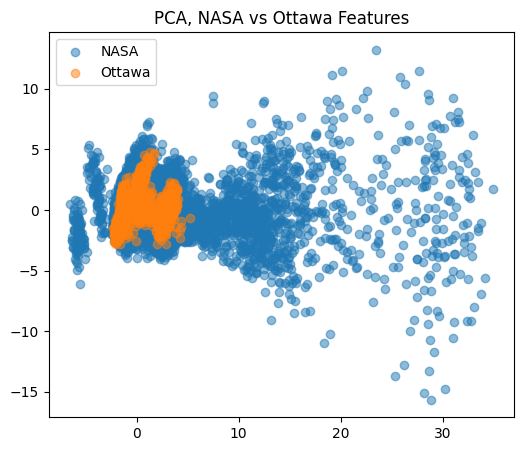

In [4]:
# PCA for both features
pca = PCA(n_components=2)
nasa_pca = pca.fit_transform(nasa_features)
ottawa_pca = pca.transform(ottawa_features)

plt.figure(figsize=(6, 5))
plt.scatter(nasa_pca[:, 0], nasa_pca[:, 1], label="NASA", alpha=0.5)
plt.scatter(ottawa_pca[:, 0], ottawa_pca[:, 1], label="Ottawa", alpha=0.5)
plt.title("PCA, NASA vs Ottawa Features")
plt.legend()
plt.show()


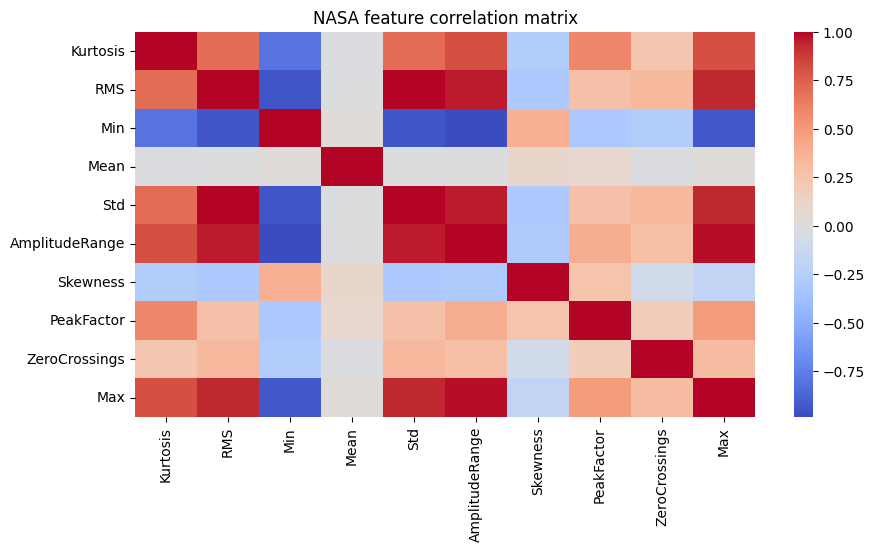

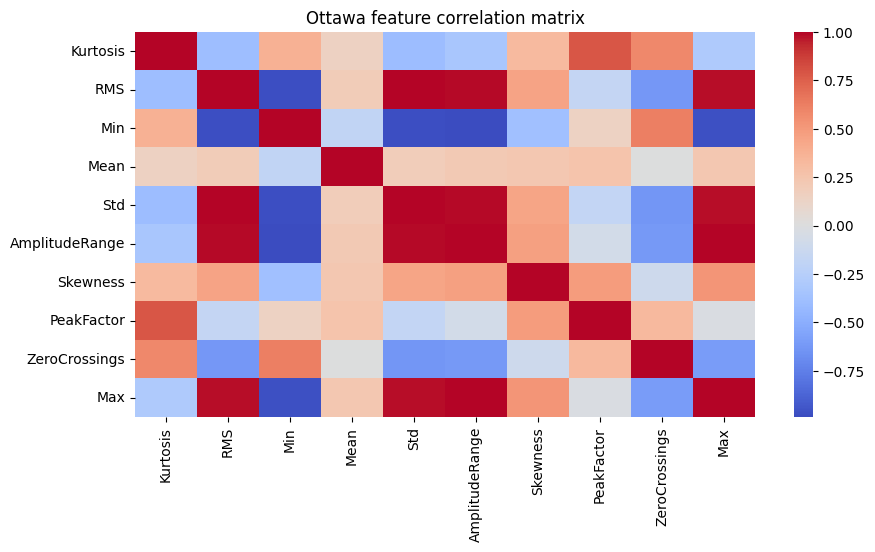

In [5]:
# Compare correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(nasa_features.corr(), annot=False, cmap="coolwarm")
plt.title("NASA feature correlation matrix")
plt.show()

plt.figure(figsize=(10, 5))
sns.heatmap(ottawa_features.corr(), annot=False, cmap="coolwarm")
plt.title("Ottawa feature correlation matrix")
plt.show()

In correlation matrix of both plot, it shows correlation of features in many aspects, such as RMS, Std, AmplitudeRange and Max. 